In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from plotnine import geom_point, ggplot, aes, geom_line
import requests
import json

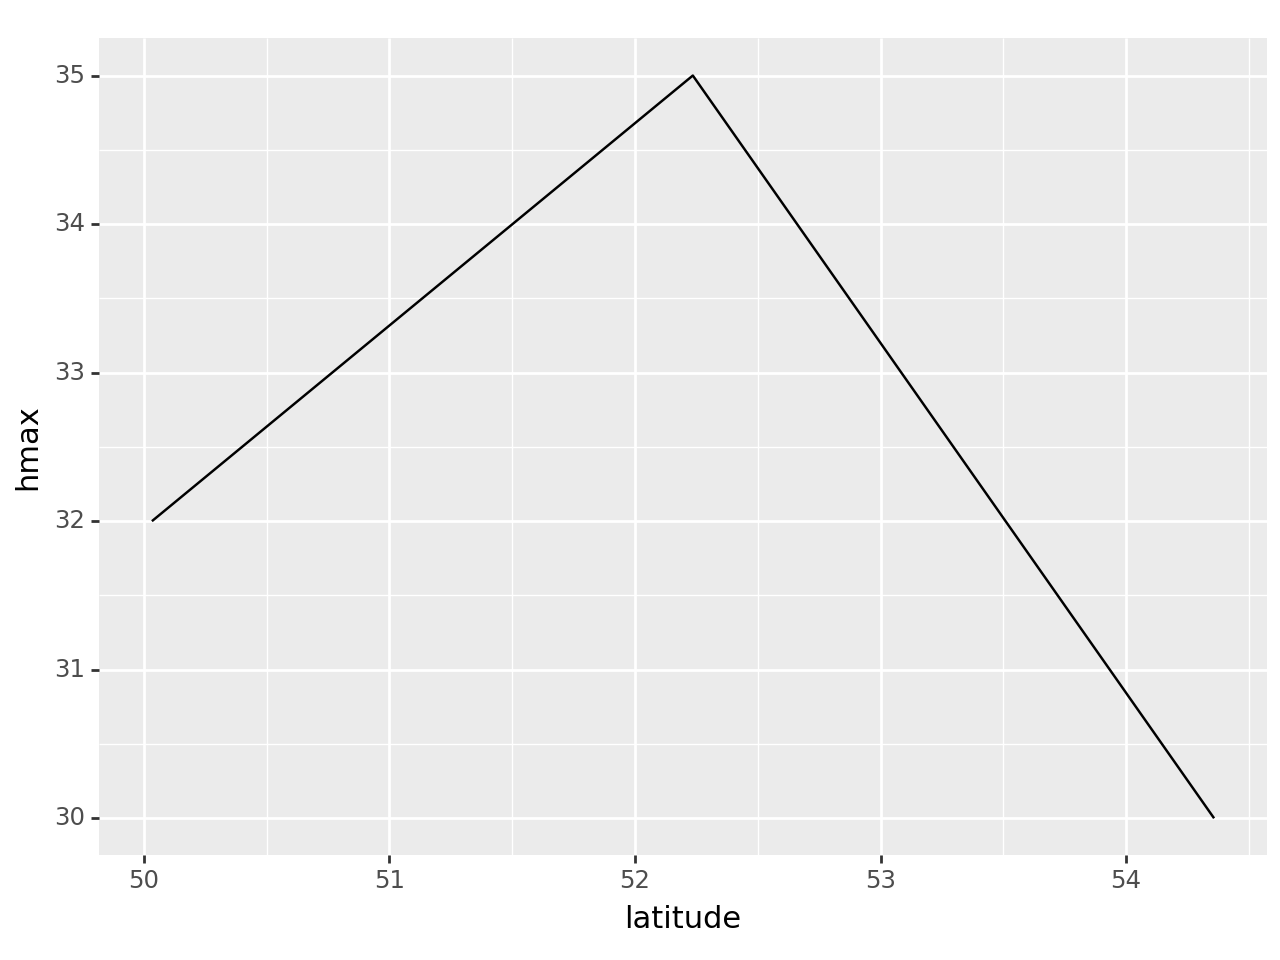

<Figure Size: (640 x 480)>

In [3]:
'''
data = pd.read_csv('data/locations.csv')
(ggplot(data, aes('latitude', 'maxtemp_his'))
 + geom_line())
y = data['hmax']  # only for tests
X = data[['latitude', 'longitude']]
lm = LinearRegression().fit(X.values, y.values)
bialystok = lm.predict(np.array([[53.175887, 19.745537]]))
lm.coef_
'''

In [56]:
response = requests.get("https://api.weatherapi.com/v1/history.json?key=797dbfda9acd48d6abb182425232111&q=52.235556,20.778275&dt=2022-01-01")

In [57]:
response.status_code

400

In [58]:
response.text

'{"error":{"code":1008,"message":"API key is limited to get history data. Please check our pricing page and upgrade to higher plan."}}'

In [17]:
response_details = json.loads(response.text)

In [47]:
response_details['location']

{'name': 'Piastow',
 'region': '',
 'country': 'Poland',
 'lat': 52.24,
 'lon': 20.78,
 'tz_id': 'Europe/Warsaw',
 'localtime_epoch': 1700846115,
 'localtime': '2023-11-24 18:15'}

In [24]:
day = response_details["forecast"]["forecastday"][0]["day"]

In [2]:
from datetime import datetime, timedelta
today = datetime.now()

In [10]:
data_frame = pd.read_csv("locations.csv")
data_frame

,city,country,continent,latitude,longitude,mintemp_his,maxtemp_his,avgtemp_his,mintemp,maxtemp,avgtemp


In [1]:
from data import get_historical_data, save_historical_data

In [2]:
cities = ['Antarctica']

In [3]:
import pandas as pd
df = pd.read_csv('locations.csv')

In [4]:
df

,city,country,continent,latitude,longitude,mintemp_his,maxtemp_his,avgtemp_his,mintemp,maxtemp,avgtemp
0,Warsaw,Poland,Europe,52.25,21.00,-12.5,34.5,11.1,8.0,28.0,20.0
1,Madrid,Spain,Europe,40.40,-3.68,-1.5,41.6,17.0,8.0,28.0,20.0
2,Lisbon,Portugal,Europe,38.72,-9.13,3.9,34.7,17.8,8.0,28.0,20.0
3,Paris,France,Europe,48.87,2.33,-4.1,35.2,13.4,8.0,28.0,20.0
4,London,United Kingdom,Europe,51.52,-0.11,-2.9,31.6,12.0,8.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
77,Perth,Australia,Australia,-31.93,115.83,7.0,37.6,19.4,15.0,28.0,20.0
78,Melbourne,Australia,Australia,-37.82,144.97,1.4,39.6,15.1,15.0,28.0,20.0
79,Brisbane,Australia,Australia,-27.50,153.02,9.1,34.6,20.8,15.0,28.0,20.0
80,Broome,Australia,Australia,-17.97,122.23,13.3,34.9,27.0,15.0,28.0,20.0


In [5]:
for city in cities:
    df = save_historical_data(df, city)

status code 400
{'error': {'code': 1006, 'message': 'No matching location found.'}}


ValueError: 8 columns passed, passed data had 0 columns

In [59]:
data_frame.reset_index(drop=True)

,city,country,continent,latitude,longitude,mintemp_his,maxtemp_his,avgtemp_his,mintemp,maxtemp,avgtemp
0,Warsaw,Poland,Europe,52.25,21.00,-12.5,34.5,11.085205,NaN,NaN,NaN
1,Warsaw,Poland,Europe,52.25,21.00,-12.5,34.5,11.085205,NaN,NaN,NaN
2,Madrid,Spain,Europe,40.40,-3.68,-1.5,41.6,16.990685,NaN,NaN,NaN
3,Lisbon,Portugal,Europe,38.72,-9.13,3.9,34.7,17.803836,NaN,NaN,NaN
4,Paris,France,Europe,48.87,2.33,-4.1,35.2,13.367945,NaN,NaN,NaN
5,London,United Kingdom,Europe,51.52,-0.11,-2.9,31.6,12.025205,NaN,NaN,NaN
6,Oslo,Norway,Europe,59.92,10.75,-18.1,27.6,4.317534,NaN,NaN,NaN
7,Stockholm,Sweden,Europe,59.33,18.05,-13.7,28.1,7.552603,NaN,NaN,NaN
8,Helsinki,Finland,Europe,60.18,24.93,-12.8,26.2,6.658630,NaN,NaN,NaN
9,Reykjavik,Iceland,Atlantic,64.15,-21.95,-14.9,18.9,4.416438,NaN,NaN,NaN


In [8]:
df['avgtemp_his'] = round(df['avgtemp_his'], 1)

In [2]:
from data import allocate_data

In [48]:
df = pd.read_csv('locations.csv')

In [18]:
df = allocate_data(df, 'Pacific', 20, 25, 30)

In [19]:
df

,city,country,continent,latitude,longitude,mintemp_his,maxtemp_his,avgtemp_his,mintemp,maxtemp,avgtemp
0,Warsaw,Poland,Europe,52.25,21.00,-12.5,34.5,11.1,8.0,28.0,20.0
1,Warsaw,Poland,Europe,52.25,21.00,-12.5,34.5,11.1,8.0,28.0,20.0
2,Madrid,Spain,Europe,40.40,-3.68,-1.5,41.6,17.0,8.0,28.0,20.0
3,Lisbon,Portugal,Europe,38.72,-9.13,3.9,34.7,17.8,8.0,28.0,20.0
4,Paris,France,Europe,48.87,2.33,-4.1,35.2,13.4,8.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
78,Perth,Australia,Australia,-31.93,115.83,7.0,37.6,19.4,15.0,20.0,28.0
79,Melbourne,Australia,Australia,-37.82,144.97,1.4,39.6,15.1,15.0,20.0,28.0
80,Brisbane,Australia,Australia,-27.50,153.02,9.1,34.6,20.8,15.0,20.0,28.0
81,Broome,Australia,Australia,-17.97,122.23,13.3,34.9,27.0,15.0,20.0,28.0


In [37]:
continent = 'Asia'
df.loc[ df.isna().any(axis=1), 'mintemp'] = 10
df.loc[ df.isna().any(axis=1), 'avgtemp'] = 20
df.loc[ df.isna().any(axis=1), 'maxtemp'] = 25

In [40]:
df.to_csv('locations.csv', index=False)

In [28]:
df.loc[df['mintemp'].isna]

TypeError: isna() takes 1 positional argument but 2 were given

In [34]:
df[df.isna().any(axis=1)]

,city,country,continent,latitude,longitude,mintemp_his,maxtemp_his,avgtemp_his,mintemp,maxtemp,avgtemp
32,Antananarivo,Madagascar,Indian,-18.92,47.52,4.7,34.3,18.0,NaN,NaN,NaN
33,Punta Arenas,Chile,America,-53.15,-70.92,-8.3,19.3,5.8,NaN,NaN,NaN
34,Buenos Aires,Argentina,America,-34.59,-58.67,0.4,43.9,19.1,NaN,NaN,NaN
35,La Paz,Bolivia,America,-16.50,-68.15,-2.7,19.0,8.0,NaN,NaN,NaN
36,Brasilia,Brazil,America,-15.78,-47.92,12.2,38.4,22.8,NaN,NaN,NaN
37,Rio De Janeiro,Brazil,America,-22.90,-43.23,12.8,38.4,23.8,NaN,NaN,NaN
38,Lima,Peru,America,-12.05,-77.05,14.3,29.5,20.4,NaN,NaN,NaN
39,Quito,Ecuador,America,-0.22,-78.50,7.2,23.3,12.8,NaN,NaN,NaN
40,Bogota,Colombia,America,4.60,-74.08,6.1,23.3,13.7,NaN,NaN,NaN
41,Caracas,Venezuela,America,10.50,-66.92,11.1,32.0,20.1,NaN,NaN,NaN


In [45]:
df.loc[df['maxtemp'] < df['avgtemp'], ['maxtemp', 'avgtemp']] = df.loc[df['maxtemp'] < df['avgtemp'], ['avgtemp', 'maxtemp']].values

In [46]:
df

,city,country,continent,latitude,longitude,mintemp_his,maxtemp_his,avgtemp_his,mintemp,maxtemp,avgtemp
0,Warsaw,Poland,Europe,52.25,21.00,-12.5,34.5,11.1,8.0,40.0,28.0
1,Warsaw,Poland,Europe,52.25,21.00,-12.5,34.5,11.1,8.0,28.0,20.0
2,Madrid,Spain,Europe,40.40,-3.68,-1.5,41.6,17.0,8.0,28.0,20.0
3,Lisbon,Portugal,Europe,38.72,-9.13,3.9,34.7,17.8,8.0,28.0,20.0
4,Paris,France,Europe,48.87,2.33,-4.1,35.2,13.4,8.0,28.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
78,Perth,Australia,Australia,-31.93,115.83,7.0,37.6,19.4,15.0,28.0,20.0
79,Melbourne,Australia,Australia,-37.82,144.97,1.4,39.6,15.1,15.0,28.0,20.0
80,Brisbane,Australia,Australia,-27.50,153.02,9.1,34.6,20.8,15.0,28.0,20.0
81,Broome,Australia,Australia,-17.97,122.23,13.3,34.9,27.0,15.0,28.0,20.0
